In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm.auto import tqdm

In [6]:
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [7]:
train_data.drop('id', inplace=True, axis=1)

## 데이터 전처리

In [9]:
train_data.isnull().values.any()

True

In [10]:
train_data = train_data.dropna(how='any')
train_data.isnull().values.any()

False

In [12]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')

C:\Users\swwho\AppData\Local\Temp\ipykernel_10824\1812313488.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')


In [13]:
train_data.head()

,document,label
0,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [16]:
stopwords = set(['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'])

okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    tokenized_data.append(stopwords_removed_sentence)

  0%|          | 0/199992 [00:00<?, ?it/s]

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


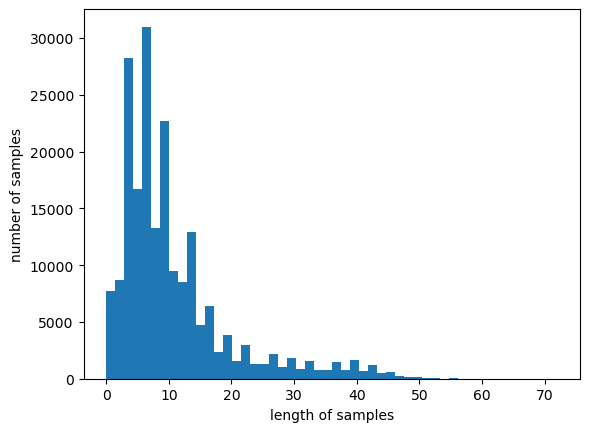

In [17]:
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## word2vec 학습

In [20]:
tokenized_data[2]

['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']

In [43]:
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=5, sg=0)

In [44]:
model.wv.vectors.shape

(16477, 100)

In [52]:
print(model.wv.most_similar('결말'))

[('반전', 0.7423701882362366), ('해피엔딩', 0.7014708518981934), ('마무리', 0.6988147497177124), ('전개', 0.657684862613678), ('결론', 0.6412957906723022), ('엔딩', 0.6123579144477844), ('예상', 0.6111219525337219), ('설정', 0.5873388051986694), ('내용', 0.5733374357223511), ('끝', 0.5696393251419067)]
